In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import r2_score

In [13]:
ENEM = pandas.read_pickle('enem_2016.pkl')

In [14]:
#Utilizando 80% dos dados no treino e 20% no teste
msk = np.random.rand(len(ENEM))<0.8
train = ENEM[msk]
teste = ENEM[~msk]

In [15]:
print(len(train))
print(len(teste))

4675730
1169237


In [16]:
#O valor que queremos estimar está na coluna Q006: Renda mensal familiar
Y_train = list(train['NU_NOTA_REDACAO'])
X_train = train.drop(columns=['NU_NOTA_REDACAO']).get_values().tolist()

In [17]:
train.describe()

,NU_NOTA_REDACAO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,...,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06,4.675730e+06
mean,5.299676e+02,4.017182e+00,2.452620e+03,1.911782e-01,1.351864e+00,2.246479e+00,5.173325e-01,2.527560e-01,1.025393e+00,3.413711e-01,...,5.207585e-01,2.712090e-02,1.769670e-01,1.387464e+00,5.515836e-01,2.551398e-01,2.358768e+00,3.769161e-01,8.089704e-01,6.635009e-01
std,1.540164e+02,1.558134e+00,2.939904e+03,8.343164e-01,6.942067e-01,7.840283e-01,6.897565e-01,4.989040e-01,2.603287e-01,5.303562e-01,...,5.126949e-01,1.769969e-01,3.816408e-01,7.670880e-01,4.973321e-01,4.359398e-01,1.077654e+00,4.846137e-01,7.782887e-01,4.725119e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.400000e+02,3.000000e+00,8.800000e+02,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.400000e+02,4.000000e+00,1.320000e+03,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,6.000000e+02,5.000000e+00,2.640000e+03,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+03,2.000000e+01,2.000000e+04,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,...,4.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00


In [18]:
#Com apenas uma árvore
arvore_todos_os_parametros = tree.DecisionTreeRegressor()
arvore_todos_os_parametros = arvore_todos_os_parametros.fit(X_train, Y_train)

In [19]:
#Testando o modelo
Y_teste = list(teste['NU_NOTA_REDACAO'])
X_teste = teste.drop(columns=['NU_NOTA_REDACAO']).get_values().tolist()
Y_predicao = arvore_todos_os_parametros.predict(X_teste)
r2_score(Y_teste, Y_predicao)

-0.29864160373902093

In [20]:
#Encontrando os coeficientes dos parametros
feat = arvore_todos_os_parametros.feature_importances_
print('Quantidade de pessoas em casa: '+str(feat[0]))
print('Empregada domestica: '+str(feat[1]))
print('Quantidade de banheiros: '+str(feat[2]))
print('Quantidade de quartos: '+str(feat[3]))
print('Quantidade de carros: '+str(feat[4]))
print('Quantidade de motos: '+str(feat[5]))
print('Quantidade de geladeiras: '+str(feat[6]))
print('Quantidade de freezer: '+str(feat[7]))
print('Quantidade de maquina de lavar roupa: '+str(feat[8]))
print('Quantidade de maquina de secar roupa: '+str(feat[9]))
print('Quantidade de micro-ondas: '+str(feat[10]))
print('Quantidade de maquina de lavar louça: '+str(feat[11]))
print('Aspirador de po: '+str(feat[12]))
print('Quantidade de televisões:'+str(feat[13]))
print('DVD: '+str(feat[14]))
print('TV por assinatura: '+str(feat[15]))
print('Quantidade de celulares: '+str(feat[16]))
print('Telefone fixo: '+str(feat[17]))
print('Quantidade de computadores: '+str(feat[18]))
print('Acesso a internet: '+str(feat[19]))

Quantidade de pessoas em casa: 0.06172347086939113
Empregada domestica: 0.21107655703935832
Quantidade de banheiros: 0.01867648503953413
Quantidade de quartos: 0.030638748397215566
Quantidade de carros: 0.0750399250271209
Quantidade de motos: 0.0651547863026242
Quantidade de geladeiras: 0.015691927746338413
Quantidade de freezer: 0.020487389136213768
Quantidade de maquina de lavar roupa: 0.0329592442355771
Quantidade de maquina de secar roupa: 0.025997835646622912
Quantidade de micro-ondas: 0.020281398668872123
Quantidade de maquina de lavar louça: 0.04417450747829296
Aspirador de po: 0.014249758378377247
Quantidade de televisões:0.03430097817546925
DVD: 0.07513777304565751
TV por assinatura: 0.04091228097962761
Quantidade de celulares: 0.04179968382206578
Telefone fixo: 0.06165532391586869
Quantidade de computadores: 0.03656019088219421
Acesso a internet: 0.061140095406053835


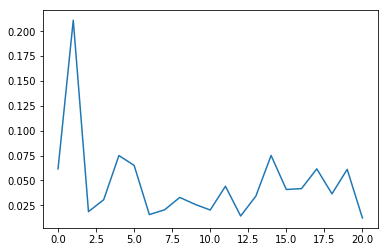

In [21]:
plt.plot(feat)
plt.show()

In [24]:
feat.sort()
feat[::-1][0:5]

array([0.37845283, 0.12580402, 0.11258054, 0.07384355, 0.04251965])

In [30]:
#Parametros mais significativos: Q008, Q007, Q010, Q024, Q005
#Q008: Quantidade de banheiros
#Q007: Empregada domestica
#Q010: Quantidade de carros
#Q024: Quantidade de computadores
#Q005: Quantidade de pessoas na casa 
ENEM_filtrado = ENEM[['Q006', 'Q008', 'Q007', 'Q010', 'Q024', 'Q005']]
mskf = np.random.rand(len(ENEM_filtrado))<0.8
trainf = ENEM_filtrado[msk]
testef = ENEM_filtrado[~msk]
Y_trainf = list(trainf['Q006'])
X_trainf = trainf.drop(columns=['Q006']).get_values().tolist()

In [34]:
arvore_parametros_filtrados = tree.DecisionTreeRegressor()
arvore_parametros_filtrados = arvore_parametros_filtrados.fit(X_trainf, Y_trainf)

In [35]:
#Testando o modelo
Y_testef = list(testef['Q006'])
X_testef = testef.drop(columns=['Q006']).get_values().tolist()
Y_predicaof = arvore_parametros_filtrados.predict(X_testef)
r2_score(Y_testef, Y_predicaof)

0.5618052778517717

In [39]:
featf = arvore_parametros_filtrados.feature_importances_
print('Quantidade de banheiros: '+str(featf[0]))
print('Empregada domestica: '+str(featf[1]))
print('Quantidade de carros: '+str(featf[2]))
print('Quantidade de computadores: '+str(featf[3]))
print('Quantidade de pessoas na casa: '+str(featf[4]))

Quantidade de banheiros: 0.5505664252793427
Empregada domestica: 0.1752234137443688
Quantidade de carros: 0.1545158310463282
Quantidade de computadores: 0.11027768050169975
Quantidade de pessoas na casa: 0.009416649428260598


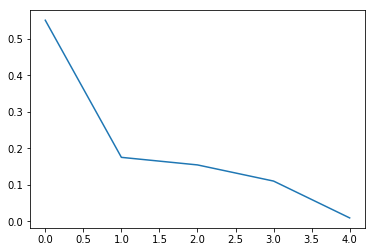

In [42]:
plt.plot(featf)
plt.show()